<h1>Supervised Learning - Cancer Data<h1>

<h2>Dataset Analysis<h2>

In [57]:
import pandas as pd

cancer_data = pd.read_csv('Cancer_Data.csv')

cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


At first glance we can see that there are plenty of parameters and more importantly, that there is a diagnosis which will tell us exactly how well our model is predicting whether the given person has a benign (B) or Malignant (M) cancer. They will work similar to 0 and 1.

As we can also see there is a column full of Nan values called Unnamed: 32, which seems to be something that will be irrelavant and thus should be discarded

In [58]:
cancer_data.drop(['Unnamed: 32'], axis = 1, inplace = True)

Now we will use the describe() function to learn more about the data

In [59]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Something weird can be seen here as the min value for concavity_worst and concave_points_worst is 0, this means that in these columns there is at least one row whose values are 0

Now let's also check for null values, the code bellow will sum the count of null values found for each column

In [60]:
cancer_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are no null values so now we have to search for outliers and fix those pesky zeros

<Axes: xlabel='concavity_worst'>

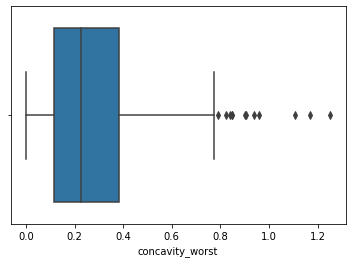

In [61]:
import seaborn as sb
sb.boxplot(x=cancer_data['concavity_worst'])

We decided to create a correlation matrix to see how certain variables were connected

In [62]:
import numpy as np

df=pd.DataFrame(cancer_data)
df.drop('diagnosis', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
corr_matrix = df.corr()

corr_matrix[(corr_matrix > -0.2) & (corr_matrix < 0.2)] = np.nan

# Drop the columns with all NaN values
corr_matrix.dropna(axis=1, how='all', inplace=True)
corr_cols = corr_matrix.columns[corr_matrix.isnull().mean() < 0.9]
print(corr_matrix)

                         radius_mean  texture_mean  perimeter_mean  area_mean   
radius_mean                 1.000000      0.323782        0.997855   0.987357  \
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean                  NaN           NaN        0.207278        NaN   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean                    NaN           NaN             NaN        NaN   
fractal_dimension_mean     -0.311631           NaN       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                  

In [63]:
# Get the columns with correlation greater than 0.1
corr_cols = list(corr_matrix[(corr_matrix != 1)].dropna(how='all', axis=1).columns)

# Plot pairplot using the selected columns
#sb.pairplot(cancer_data[corr_cols])

Our approach now is going to be to remove the outliers found outside of the range of the mean plus or minus the st_deviation, note that we also multiply it by a threshold, in this case we use a threshold of 3. (We previosuly tried with a threshold of 5 but it wasn't enough to remove the outliers)

<Axes: xlabel='concavity_worst'>

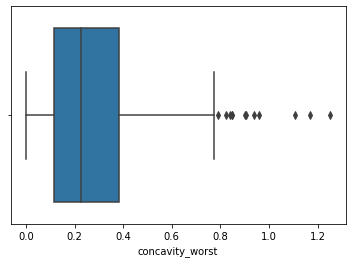

In [64]:
from copy import deepcopy

cancer_data_outliersClear = deepcopy(cancer_data)

# Range to identify outliers
threshold = 3


# Loop through all columns in the DataFrame, excluding the diagnosis
for column in cancer_data_outliersClear.loc[:, ~cancer_data_outliersClear.columns.isin(['diagnosis'])]:  
    
    # Mean and STD of the column
    mean = cancer_data_outliersClear[column].mean()
    st_deviation = cancer_data_outliersClear[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * st_deviation
    upper_limit = mean + threshold * st_deviation

    # Remove outliers
    #cancer_data_outliersClear = cancer_data_outliersClear.loc[(cancer_data_outliersClear[column] >= lower_limit) & (cancer_data_outliersClear[column] <= upper_limit)]


#cancer_data_outliersClear.to_csv('Cancer_Data_OutlierClean.csv', index=False)

sb.boxplot(x=cancer_data_outliersClear['concavity_worst'])

<Axes: xlabel='concavity_worst'>

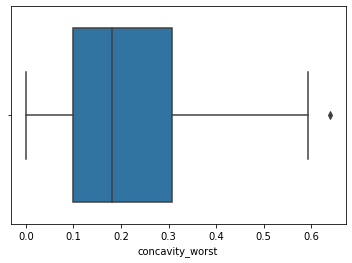

In [65]:
cancer_data_outliersClear = pd.read_csv('Cancer_Data_OutlierClean.csv')
sb.boxplot(x=cancer_data_outliersClear['concavity_worst'])

This is the example of one variable to show that the outliers have been removed (Not all of them though as sometimes if the supposed outlier is close enough, it may not be an outlier but actually an important piece of data), so now  we can start the classification.

<h1>Balancing the Dataset - SMOTE</h1>

The data is unbalanced as there are several more Benign cases than Malignent ones so we need to fix it. To do this we use the SMOTE technique where we use the function fit_resample and then print the result to guarantee that the diagnosis column is perfectly balanced (as all things should be).

In [66]:
from imblearn.over_sampling import SMOTE

# Separate the features and labels
X = cancer_data_outliersClear.drop(['id', 'diagnosis'], axis=1).values
y = cancer_data_outliersClear['diagnosis'].values

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=1)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
unique_classes, class_counts = np.unique(y_balanced, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print("Class {}: {}".format(cls, count))

Class B: 308
Class M: 308


<h1>Feature Engineering</h1>

Here we use columns with high correlation and merge them to create new columns that will improve our model

In [67]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X_balanced, columns=cancer_data_outliersClear.drop(['id', 'diagnosis'], axis=1).columns).corr()

# Find columns with high correlation
high_corr_columns = set()
for i, col_i in enumerate(correlation_matrix.columns):
    for j, col_j in enumerate(correlation_matrix.columns[:i]):
        if col_i in correlation_matrix.columns and col_j in correlation_matrix.columns:
            if abs(correlation_matrix.loc[col_i, col_j]) > 0.9:
                high_corr_columns.add(col_i)
                high_corr_columns.add(col_j)

# Merge the high correlation columns
merged_columns = []
for col in high_corr_columns:
    if col in correlation_matrix.columns:
        correlated_cols = correlation_matrix[correlation_matrix[col].abs() > 0.9].index.tolist()
        merged_column = "_".join(correlated_cols)
        merged_columns.append(merged_column)

# Drop the original high correlation columns
cancer_data_merged = cancer_data_outliersClear.drop(list(high_corr_columns), axis=1)

# Add the merged columns to the dataframe
for merged_column in merged_columns:
    if merged_column in correlation_matrix.columns:
        merged_values = cancer_data_outliersClear[correlation_matrix[merged_column].abs() > 0.9].mean(axis=1)
        cancer_data_merged[merged_column] = merged_values

# Print the resulting dataframe with merged columns
print(cancer_data_merged.head())

         id diagnosis  smoothness_mean  compactness_mean  symmetry_mean   
0  84300903         M          0.10960           0.15990         0.2069  \
1  84358402         M          0.10030           0.13280         0.1809   
2    844359         M          0.09463           0.10900         0.1794   
3  84458202         M          0.11890           0.16450         0.2196   
4    845636         M          0.08206           0.06669         0.1528   

   fractal_dimension_mean  texture_se  smoothness_se  compactness_se   
0                 0.05999      0.7869       0.006150        0.040060  \
1                 0.05883      0.7813       0.011490        0.024610   
2                 0.05742      0.7732       0.004314        0.013820   
3                 0.07451      1.3770       0.008805        0.030290   
4                 0.05697      1.1870       0.004029        0.009269   

   concavity_se  concave points_se  symmetry_se  fractal_dimension_se   
0       0.03832           0.020580      0.0

<h1>Decision Tree</h1>

The training and testing inputs and labels are based on the merged data from the feature engineering that was previously balanced, otherwise in this model it may not give a correct representation even if the accuracy were to be extremely high

Decision Tree Classifier Accuracy: 81.90%
Confusion Matrix:
[[70  8]
 [11 16]]
Precision: 0.67
Recall: 0.59
F1 Score: 0.63
Training Time: 0.01 seconds


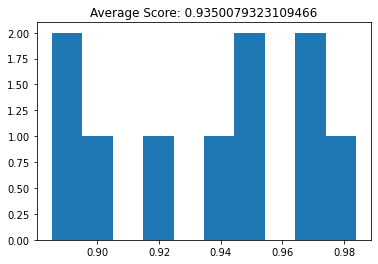

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Split the data into training and test sets, stratified by the diagnosis column
training_inputs, testing_inputs, training_labels, testing_labels = train_test_split(
    cancer_data_merged.drop(['diagnosis'], axis=1).values, cancer_data_merged['diagnosis'].values,
    test_size=0.25, stratify=cancer_data_merged['diagnosis'].values,random_state=1)

# Create the decision tree classifier
dtc = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set and measure the training time
start_time = time.time()
dtc.fit(training_inputs, training_labels)
training_time = time.time() - start_time

# Predict the labels of the test set using the trained classifier
predicted_labels = dtc.predict(testing_inputs)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(testing_labels, predicted_labels)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Create the confusion matrix
confusion_matrix = confusion_matrix(testing_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(testing_labels, predicted_labels, pos_label='M')
recall = recall_score(testing_labels, predicted_labels, pos_label='M')
f1 = f1_score(testing_labels, predicted_labels, pos_label='M')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Print the training time in seconds
print("Training Time: {:.2f} seconds".format(training_time))

# Perform cross-validation and plot the histogram of scores
cv_scores = cross_val_score(dtc, X_balanced, y_balanced, cv=10)
plt.hist(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))
plt.show()

The decision tree classifier can correctly predict the diagnostic (benign or malignant) for the majority of the samples in the testing set, as evidenced by its accuracy of 81.9%. However, it's crucial to take into account the particular context and application of cancer detection, since high accuracy alone could not be sufficient. False positives (FP) and false negatives (FN) in medical applications can both have serious repercussions.

The confusion matrix offers more information about the performance. It demonstrates that the classifier accurately recognized 16 cancer instances as true positives and 70 benign cases as true negatives. But it also incorrectly labeled 11 benign patients as malignant and 8 benign cases as malignant (false positives). When malignant cases are incorrectly diagnosed as benign, it can have grave consequences.

The graph shows that the scores from the cross validation were close together which means that our accuracy is not misleading.

The training time was quite fast, bellow 0.01 seconds in this case.

<h1>Support Vector Machine</h1>

We use the same logic as the previous model for the training/testing sets

SVM Classifier Accuracy: 73.33%
Confusion Matrix:
[[76  0]
 [28  1]]
Precision: 1.00
Recall: 0.03
F1 Score: 0.07
Training Time: 0.00 seconds


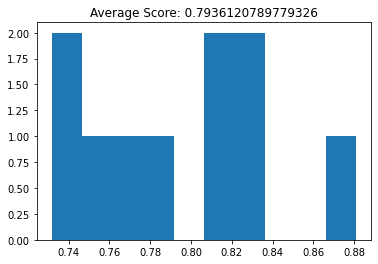

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Create a new dataframe without the 'id' column
cancer_data_new = cancer_data_merged.drop(['id'], axis=1)

# Split the data into training and testing sets
all_inputs = cancer_data_new.drop(['diagnosis'], axis=1).values
all_labels = cancer_data_new['diagnosis'].values
training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
    all_inputs, all_labels, test_size=0.25,random_state=1)

# Create the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=1)

# Train the SVM classifier on the training set and measure the training time
start_time = time.time()
svm_classifier.fit(training_inputs, training_classes)
training_time = time.time() - start_time

# Predict the classes of the testing set using the SVM classifier
predictions = svm_classifier.predict(testing_inputs)

# Compute the accuracy score of the SVM classifier
accuracy = accuracy_score(testing_classes, predictions)
print("SVM Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Create the confusion matrix
confusion_matrix = confusion_matrix(testing_classes, predictions)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(testing_classes, predictions, pos_label='M')
recall = recall_score(testing_classes, predictions, pos_label='M')
f1 = f1_score(testing_classes, predictions, pos_label='M')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Print the training time in seconds
print("Training Time: {:.2f} seconds".format(training_time))

# Perform cross-validation and plot the histogram of scores
cv_scores = cross_val_score(dtc, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))
plt.show()

On the merged data, the SVM classifier had an accuracy of 73.33%. This suggests that roughly 73.33% of the test samples had their diagnoses properly predicted by the classifier. However, we can see certain performance restrictions in the classifier when we examine the confusion matrix.

The 76 true negatives in the matrix and the confusion matrix demonstrate that the SVM classifier accurately detected all benign situations (true negatives). Nevertheless, it had trouble correctly predicting malignant cases, which led to a small number of true positives (1), as well as a large number of false negatives (28). This shows that the classifier had trouble differentiating between benign and malignant cases.

This case is a perfect example of how even though we have a result of perfect precision, it doesn't tell the full story as we have a recall of 0.03 and F1 score of 0.07 meaning that this model has trouble working with our set. This is evindence even more by the fact that the values of the cross validation shown in the graph are quite far from each other.

Despite also barely taking any time, just like the decision tree, this is by far our worst performing model.

<h1>Neural Network</h1>

In this model we will be using 50 epochs to improve results

In [70]:

binary_cancer_data = cancer_data_merged.copy()
binary_cancer_data['diagnosis'] = pd.factorize(binary_cancer_data['diagnosis'])[0]

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Split the data into training and testing sets
X = binary_cancer_data.drop(['id', 'diagnosis'], axis=1).values
y = binary_cancer_data['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Scale the data to improve training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and measure the time
start_time = time.time()
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
end_time = time.time()

# Predict the labels of the test set using the trained model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes, num_classes=2)

# Print the confusion matrix, precision, recall, F1 score, and training time
print("Confusion Matrix:")
print(confusion_matrix.numpy())
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Training Time: {:.2f} seconds".format(end_time - start_time))

Epoch 1/50
10/10 [==============================] - 1s 18ms/step - loss: 0.6832 - accuracy: 0.5737 - val_loss: 0.5594 - val_accuracy: 0.7619
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7885 - val_loss: 0.4787 - val_accuracy: 0.8000
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.8173 - val_loss: 0.4329 - val_accuracy: 0.8095
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.8365 - val_loss: 0.3996 - val_accuracy: 0.8190
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8494 - val_loss: 0.3706 - val_accuracy: 0.8476
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8462 - val_loss: 0.3450 - val_accuracy: 0.8667
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.8654 - val_loss: 0.3221 - val_accuracy: 0.8762
Epoch 8/50
10/10 [=

The neural network classifier's accuracy on the dataset was 90.48%, demonstrating that it can reliably predict the diagnosis in most situations and this is by far our best model. Note that it uses our merged data as well.

A precision of 0.91 was shown by the classifier, demonstrating a low proportion of false positives. This means that 91% of the time, the classifier's predictions of a malignant diagnosis were accurate.

The neural network classifier successfully recognized a sizable fraction of malignant patients with a recall of 0.96. This high recall means that 96% of the actual malignant cases in the dataset were properly identified by the classifier.

The precision and recall-balancing F1 score was 0.94. This score provides an overall evaluation of the classifier's performance by accounting for both false positives and false negatives.

The confusion matrix also shows how good this model turned out as the number of false positives and false negatives is just 10 in total for both, which means that this neural network would be safe to use in cancer studies as it barely gives any false negatives that in our case are worse than false positives. Although both can be really bad, telling someone that they don't have cancer when they do can have deadly consequences.